In [1]:
!nvidia-smi

Tue Nov 28 09:54:09 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.161.03   Driver Version: 470.161.03   CUDA Version: 11.4     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   38C    P0    26W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/kaggle/working


### Install YOLOv8

In [3]:
!pip install ultralytics==8.0.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 219.8/219.8 kB 4.4 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 kB 13.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 13.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for antlr4-python3-runtime: filename=antlr4_python3_runtime-4.9.3-py3-none-any.whl size=144554 sha256=fac32dc187ad7a4adb414cc85e8ae201bbf406670797f77140c8cb9759d98376
  Stored in directory: /root/.cache/pip/wheels/12/93/dd/1f6a127edc45659556564c5730f6d4e300888f4bca2d4c5a88
Successfully built antlr4-python3-runtime


In [4]:
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.0 🚀 Python-3.10.12 torch-2.0.0 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)
Setup complete ✅ (4 CPUs, 31.4 GB RAM, 5173.4/8062.4 GB disk)


In [5]:
%cd {HOME}

/kaggle/working


In [6]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="b5R2xzRKu5lIgFH59viX")
project = rf.workspace("ps7").project("pedestrian-signs-and-lanes")
dataset = project.version(23).download("yolov8")

  Obtaining dependency information for roboflow from https://files.pythonhosted.org/packages/33/5d/0b0b6a9e5e62cb79dd86c335a6c7f25e8f204d2f724496af0cba08058306/roboflow-1.1.9-py3-none-any.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 3.9 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 6.2 MB/s eta 0:00:00
  Obtaining dependency information for opencv-python-headless==4.8.0.74 from https://files.pythonhosted.org/packages/76/02/f128517f3ade4bb5f71e2afd8461dba70e3f466ce745fa1fd1fade9ad1b7/opencv_python_headless-4.8.0.74-cp37-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 6.6 MB/s eta 0:00:00
  Obtaining dependency information for supervision from https://files.pythonhosted.org/packages/c0/59/6bc863f530c0ba5da4c565fd40f17b2b333c2ab28b783202937293ae494a/supervision-0.16.0-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.3/63.3 kB 6.

A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3


loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.0.0, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to Pedestrian-Signs-and-Lanes-23 in yolov8:: 100%|██████████| 49278/49278 [00:04<00:00, 10688.67it/s]


In [13]:
!pip install wandb
import wandb
wandb.init(project="PedestrianTrafficLightDetection", entity="xinjie6016")

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

  ········································


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


### Custom Training

In [14]:
%cd {HOME}
!yolo task=detect mode=train model=yolov8s.pt data='/kaggle/working/Pedestrian-Signs-and-Lanes-23/data.yaml' epochs=80 imgsz=640

/kaggle/working
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/kaggle/working/Pedestrian-Signs-and-Lanes-23/data.yaml, epochs=80, patience=50, batch=16, imgsz=640, save=True, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=False, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, retina_masks=False, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False, simplify=False, opset=17, workspace=4, nms=False, lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.

In [16]:
!ls {HOME}/runs/detect/train2/

F1_curve.png					   train_batch2.jpg
PR_curve.png					   train_batch99330.jpg
P_curve.png					   train_batch99331.jpg
R_curve.png					   train_batch99332.jpg
args.yaml					   val_batch0_labels.jpg
confusion_matrix.png				   val_batch0_pred.jpg
events.out.tfevents.1701165905.6b79fda66628.298.0  val_batch1_labels.jpg
predictions.json				   val_batch1_pred.jpg
results.csv					   val_batch2_labels.jpg
results.png					   val_batch2_pred.jpg
train_batch0.jpg				   weights
train_batch1.jpg


In [18]:
from IPython.display import Image

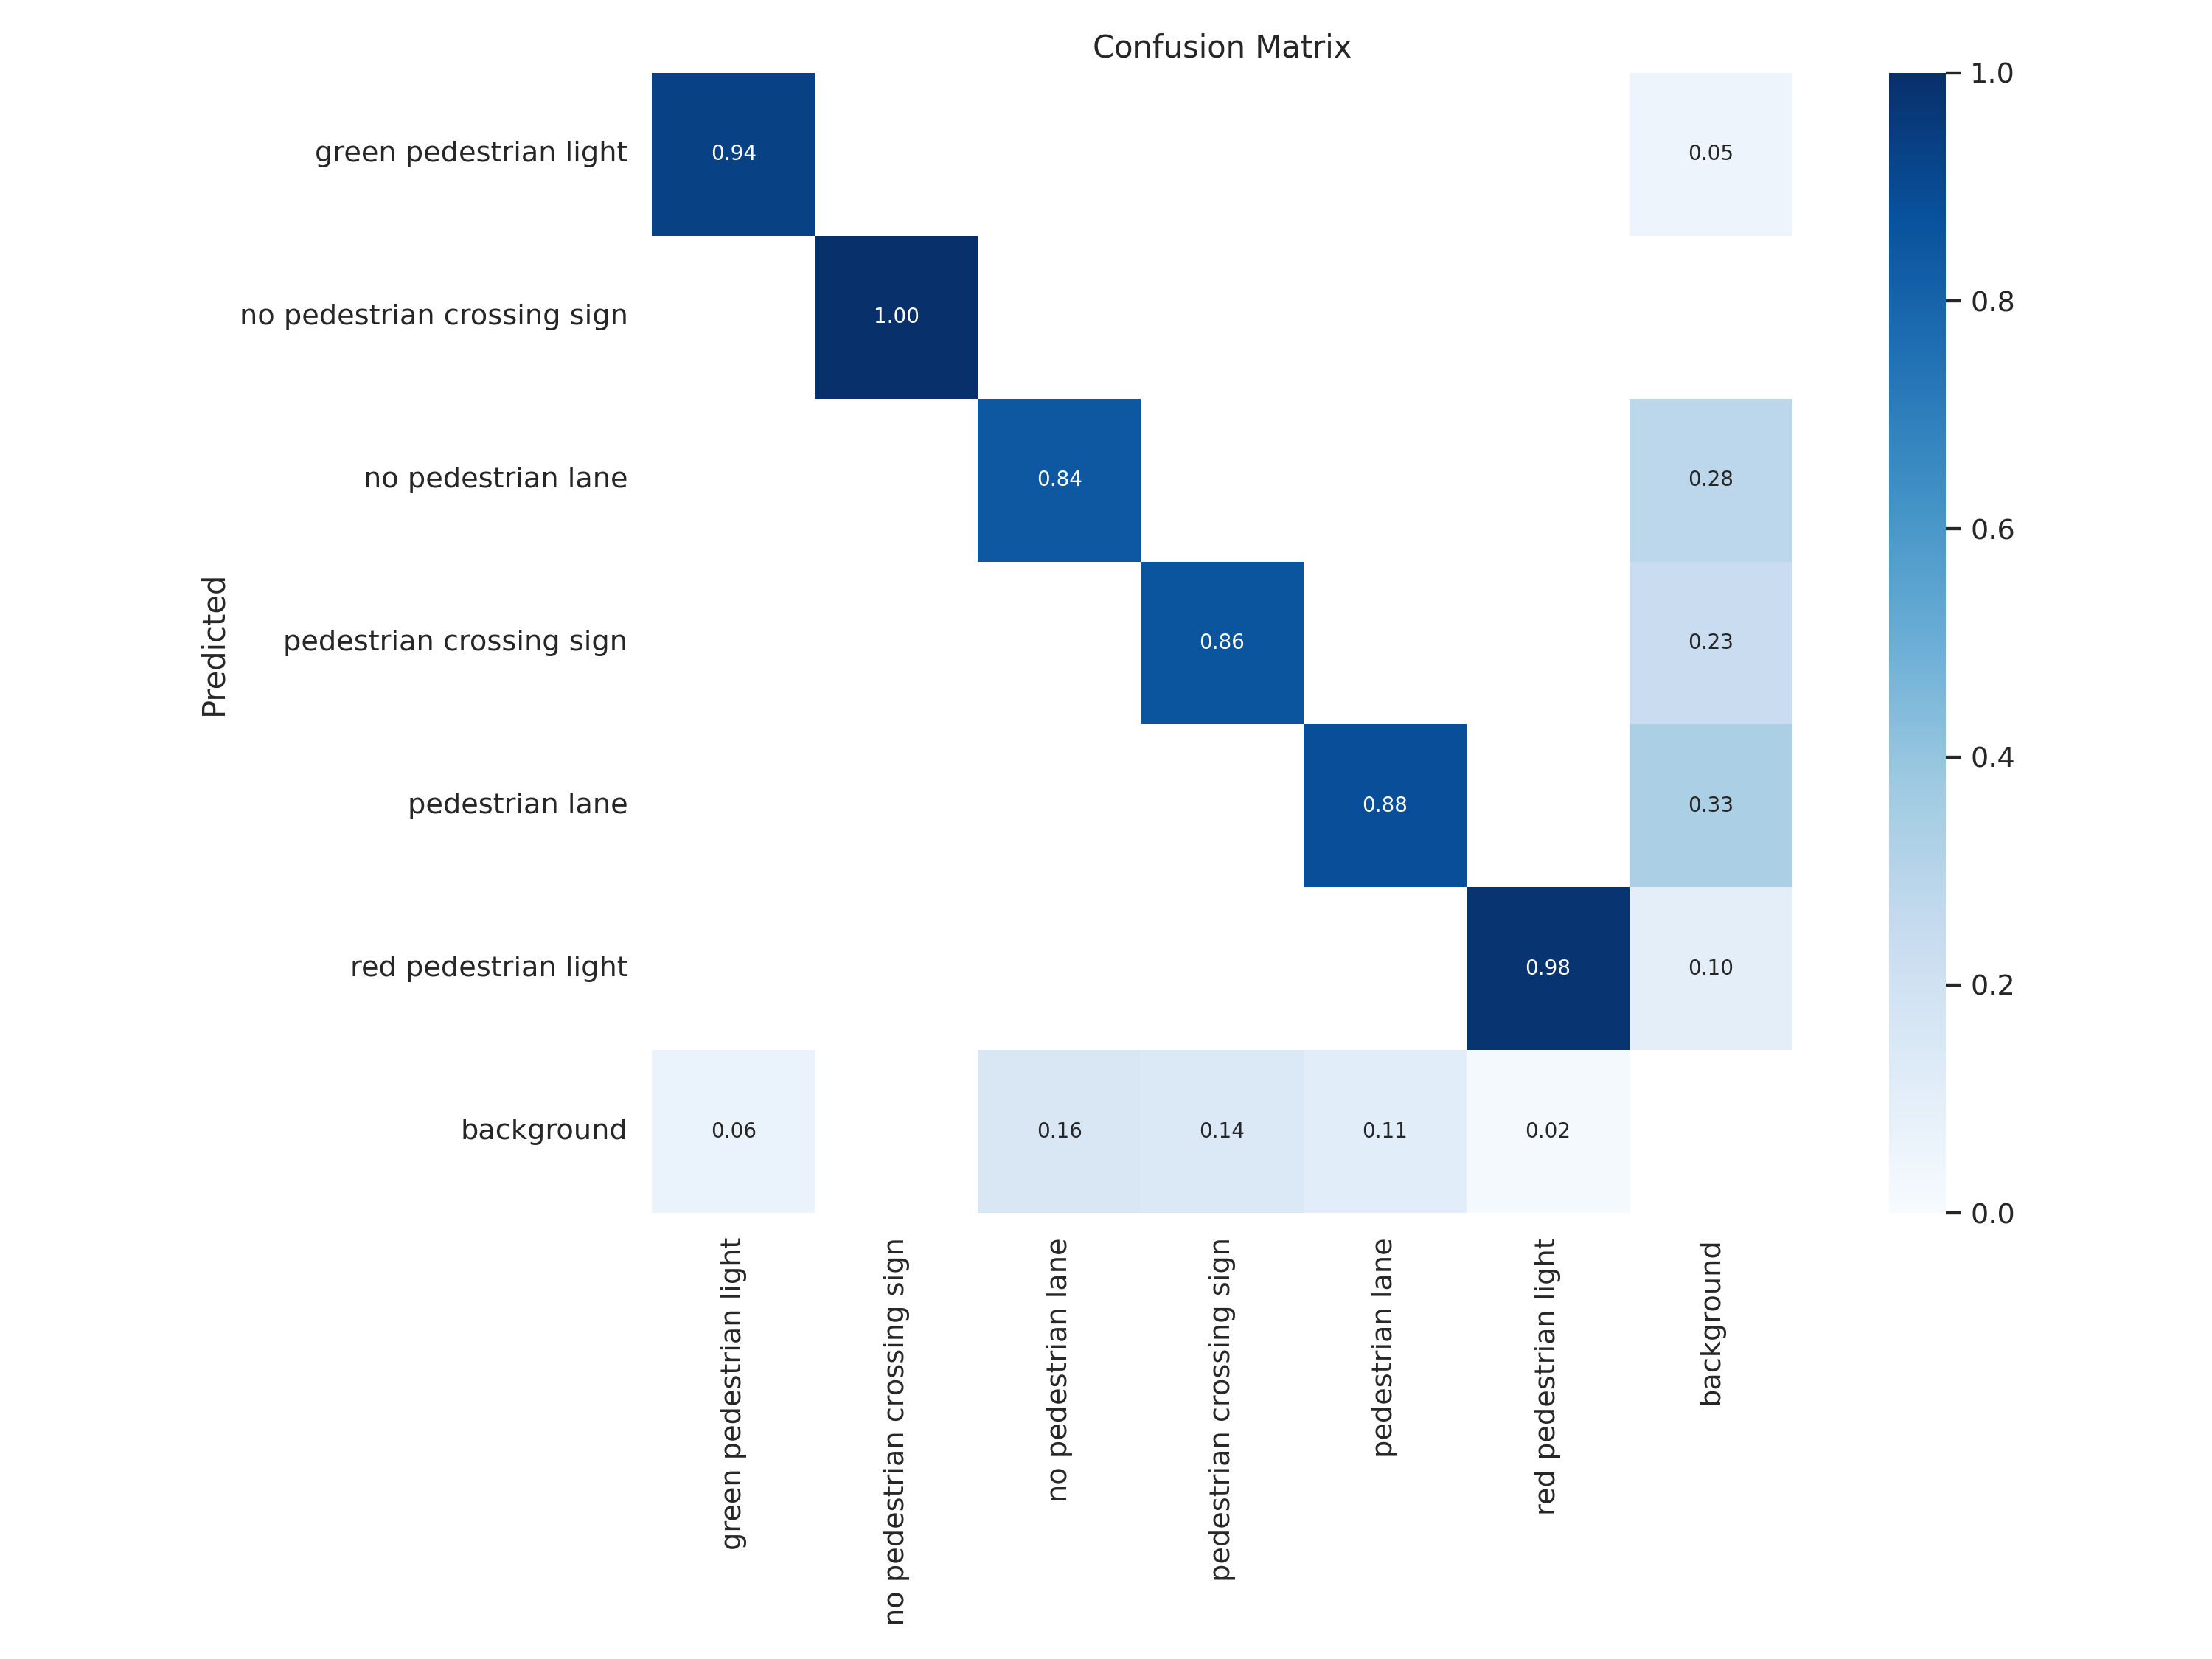

In [25]:
Image(filename = f"{HOME}/runs/detect/train2/confusion_matrix.png", width = 800)

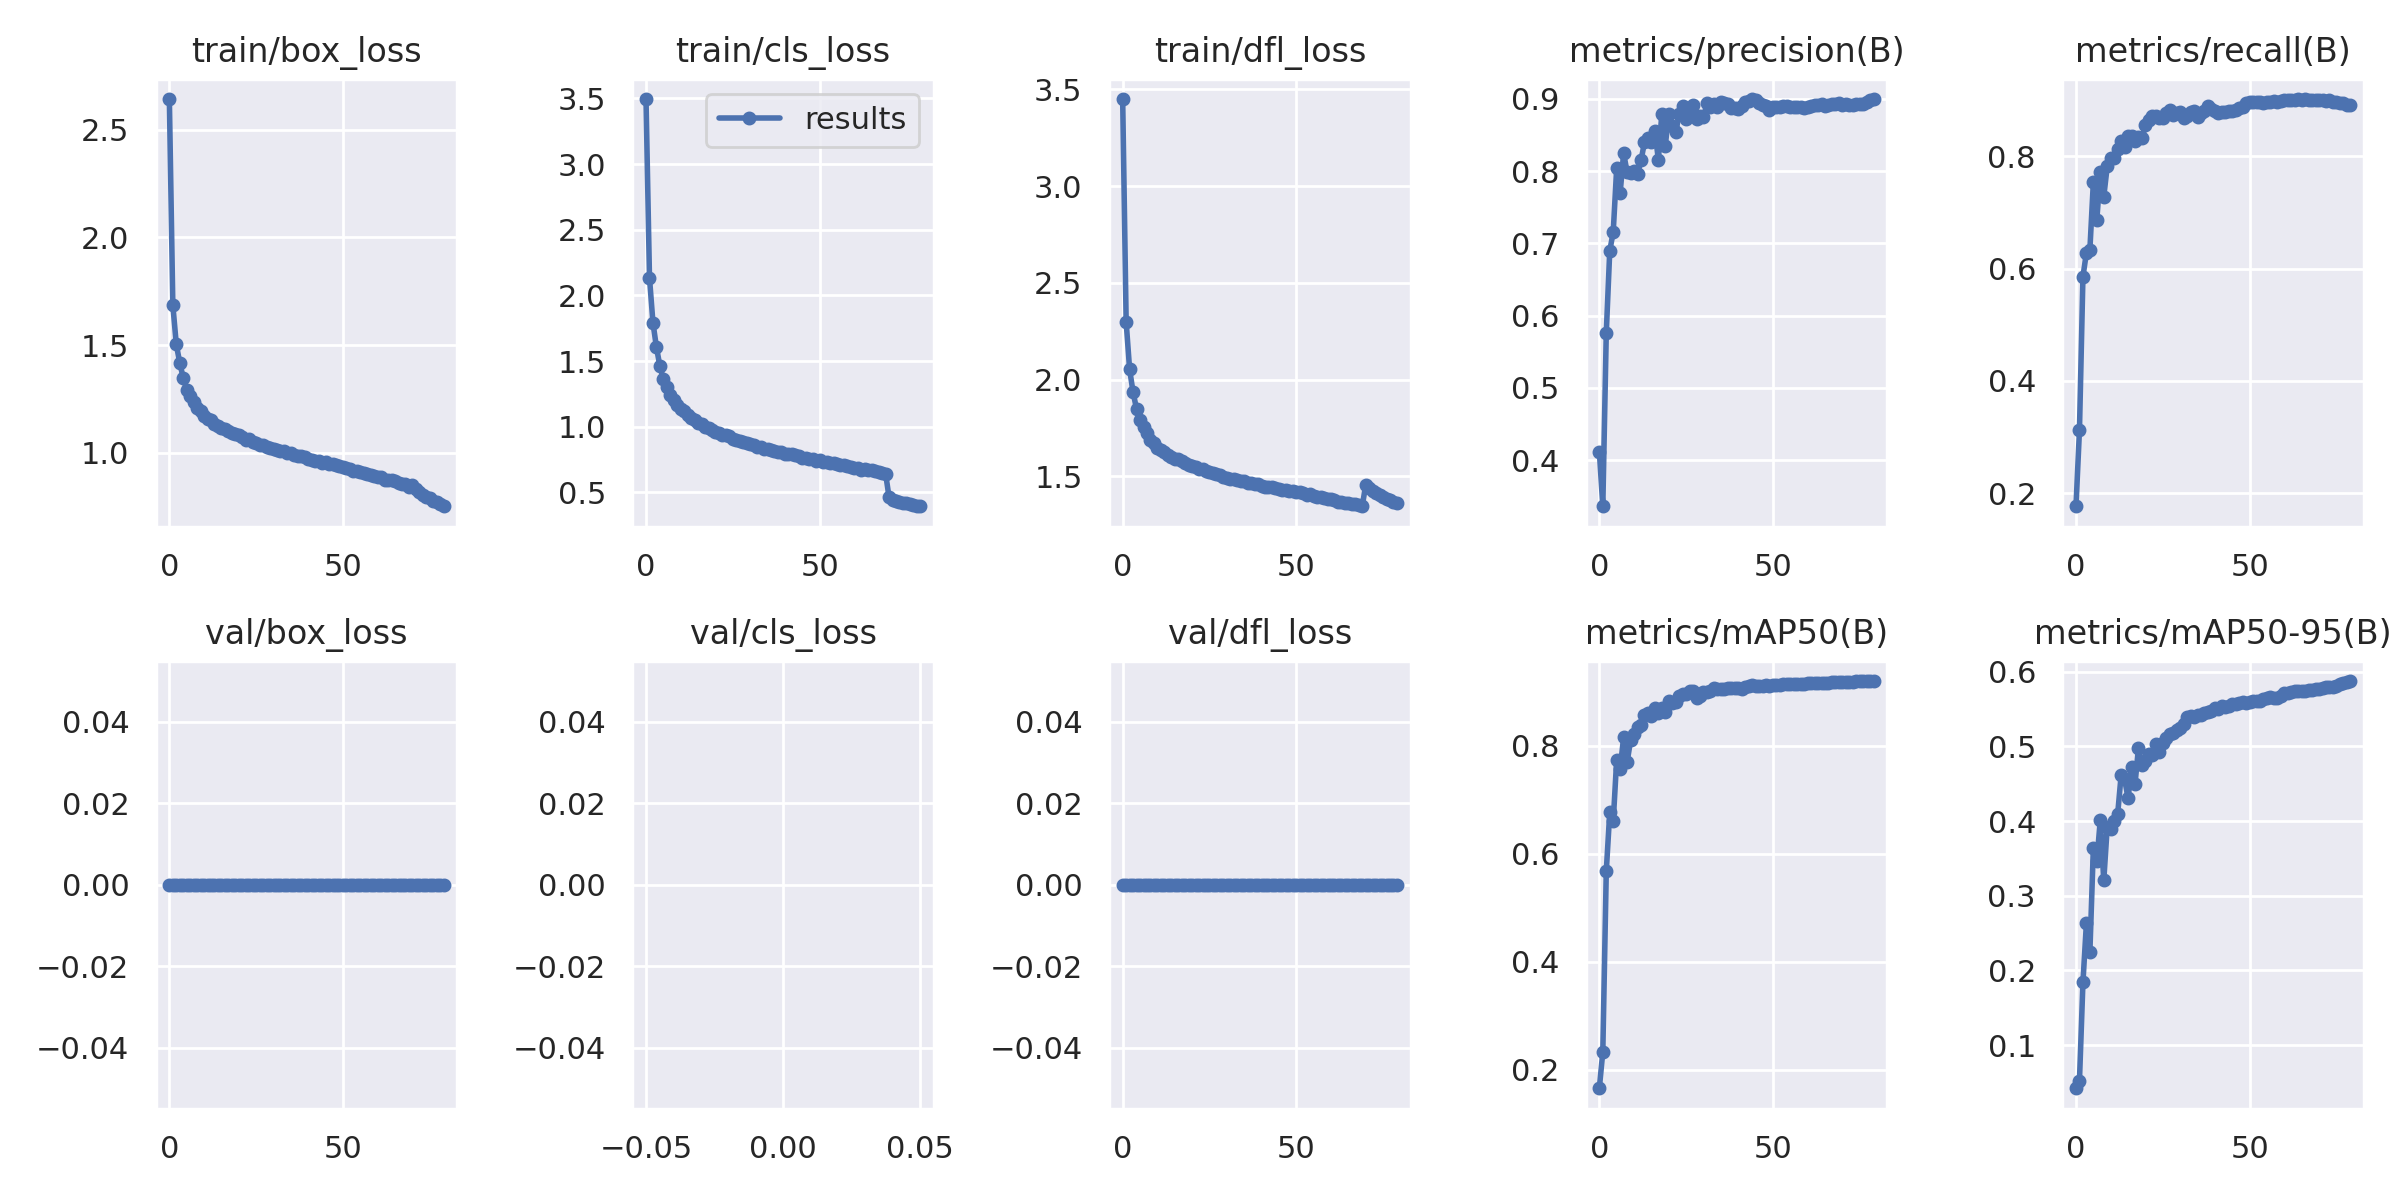

In [26]:
Image(filename = f"{HOME}/runs/detect/train2/results.png", width = 1000)

### Validate Custom Model

In [28]:
!yolo task=detect mode=val model={HOME}/runs/detect/train2/weights/best.pt data={dataset.location}/data.yaml

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
Ultralytics YOLOv8.0.0 🚀 Python-3.10.12 torch-2.0.0 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)
Fusing layers... 
Model summary: 168 layers, 11127906 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /kaggle/working/Pedestrian-Signs-and-Lanes-23/valid/labels.cache..
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all        954        908        0.9      0.892       0.92      0.588
green pedestrian light        954         78      0.912      0.932      0.925       0.52
no pedestrian crossing sign        954         33      0.954          1      0.992      0.842
    no pedestrian lane        954        219       0.83      0.795      0.861      0.386
pedestrian crossing sign        954        1

### Inference with Custom Model

In [30]:
!yolo task=detect mode=predict model={HOME}/runs/detect/train2/weights/best.pt conf=0.25 source={dataset.location}/test/images

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
Ultralytics YOLOv8.0.0 🚀 Python-3.10.12 torch-2.0.0 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)
Fusing layers... 
Model summary: 168 layers, 11127906 parameters, 0 gradients, 28.4 GFLOPs
image 1/975 /kaggle/working/Pedestrian-Signs-and-Lanes-23/test/images/gpl-1-_augmented_5_jpg.rf.fcaaf955937009cd2a9a630365bd575f.jpg: 640x640 1 green pedestrian light, 7.8ms
image 2/975 /kaggle/working/Pedestrian-Signs-and-Lanes-23/test/images/gpl-104-_augmented_4_jpg.rf.ddc041cd5905a0a83c121e1f7c0d16c8.jpg: 640x640 1 green pedestrian light, 7.8ms
image 3/975 /kaggle/working/Pedestrian-Signs-and-Lanes-23/test/images/gpl-123-_jpg.rf.3aa43a6067537a5bd9e22f0b4f6c5712.jpg: 640x640 1 green pedestrian light, 7.8ms
image 4/975 /kaggle/working/Pedestrian-Signs-and-Lane

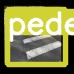

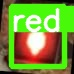

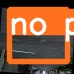

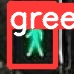

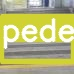

In [39]:
import glob
from IPython.display import Image,display

for image_path in glob.glob(f'{HOME}/runs/detect/predict/*.jpg')[:5]:
  display(Image(filename=image_path, width=300))
  print("\n")

In [57]:
!yolo task=detect mode=predict model={HOME}/runs/detect/train2/weights/best.pt conf=0.25 source=/kaggle/input/test-image/test3.png

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.0.0 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)
Model summary (fused): 168 layers, 11127906 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /kaggle/input/test-image/test3.png: 608x640 1 green pedestrian light, 77.9ms
Speed: 7.4ms preprocess, 77.9ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 640)
Results saved to runs/detect/predict6
💡 Learn more at https://docs.ultralytics.com/modes/predict


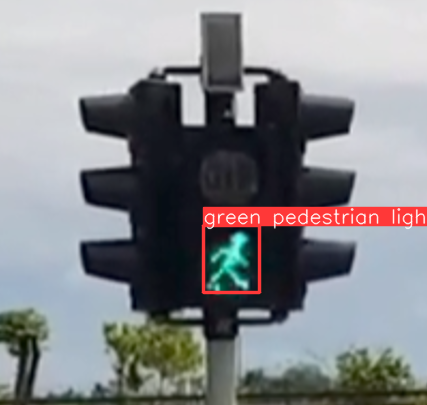

In [59]:
image_path = '/kaggle/working/runs/detect/predict6/test3.png'
Image(filename=image_path, width=300)

In [55]:
!yolo task=detect mode=predict model={HOME}/runs/detect/train2/weights/best.pt conf=0.25 source=/kaggle/input/test-image/test6.png

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.0.0 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)
Model summary (fused): 168 layers, 11127906 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /kaggle/input/test-image/test6.png: 384x640 1 pedestrian lane, 76.9ms
Speed: 5.8ms preprocess, 76.9ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/detect/predict5
💡 Learn more at https://docs.ultralytics.com/modes/predict


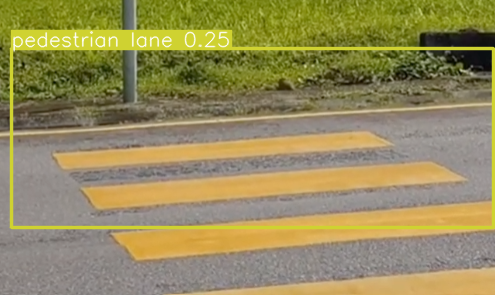

In [56]:
image_path = '/kaggle/working/runs/detect/predict5/test6.png'
Image(filename=image_path, width=300)

In [60]:
!yolo task=detect mode=predict model={HOME}/runs/detect/train2/weights/best.pt conf=0.25 source=/kaggle/input/test-image/test5.png

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.0.0 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)
Model summary (fused): 168 layers, 11127906 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /kaggle/input/test-image/test5.png: 640x640 1 red pedestrian light, 13.0ms
Speed: 8.6ms preprocess, 13.0ms inference, 4.2ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict7
💡 Learn more at https://docs.ultralytics.com/modes/predict


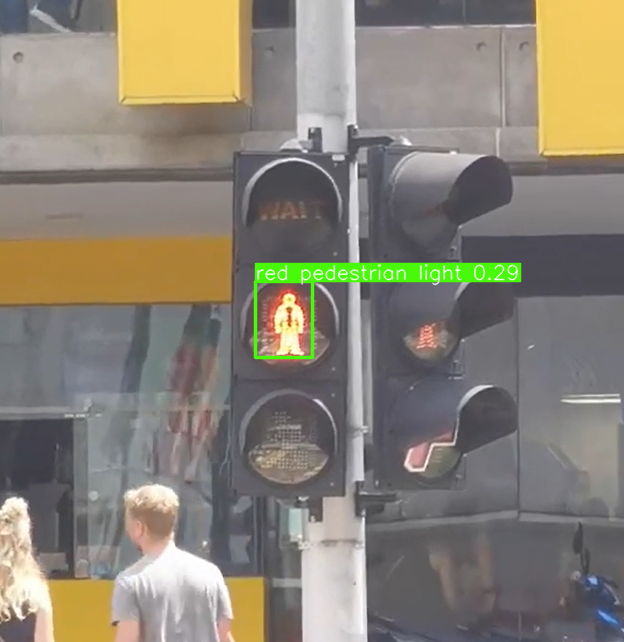

In [61]:
image_path = '/kaggle/working/runs/detect/predict7/test5.png'
Image(filename=image_path, width=300)